In [6]:
include("backend.jl")
using Plots
using LaTeXStrings
using ProgressBars
using CurveFit
using Measurements

In [2]:
Threads.nthreads()

8

## Task a

- varying s

In [3]:
function calculateResults()
    s_list = [0.1, 1.0, 10.0]
    
    stds = []
    avEs = []
    
    for (i,s) in collect(enumerate(s_list))
        avE, stdE = runSimulation(M=300,N=30000,n=1000,n_eq=0,s=s,α=0.15,β=0.5,κ=2.0)
        push!(stds, stdE)
        push!(avEs, avE)
    end

    return avEs, stds
end


calculateResults (generic function with 1 method)

In [4]:
@time avEs, stds = calculateResults()
display(stds[1][end])
display(stds[2][end])
display(stds[3][end])

 16.413190 seconds (352.80 M allocations: 25.557 GiB, 14.31% gc time, 1.49% compilation time)


0.013388648060373487

0.0026624721894430133

0.010021424617652156

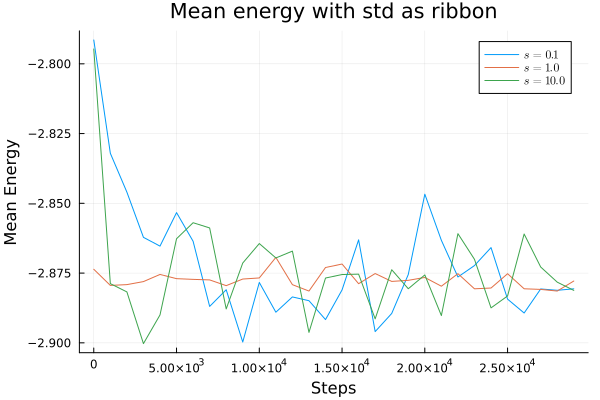

In [12]:
p = plot(1:1000:30000,avEs[1], label=L"s=0.1")
plot!(1:1000:30000,avEs[2], label=L"s=1.0")
plot!(1:1000:30000,avEs[3], label=L"s=10.0")
xlabel!("Steps")
ylabel!("Mean Energy")
title!("Mean energy with std as ribbon")

savefig(p, "saves/task1a.energies.pdf")
display(p)


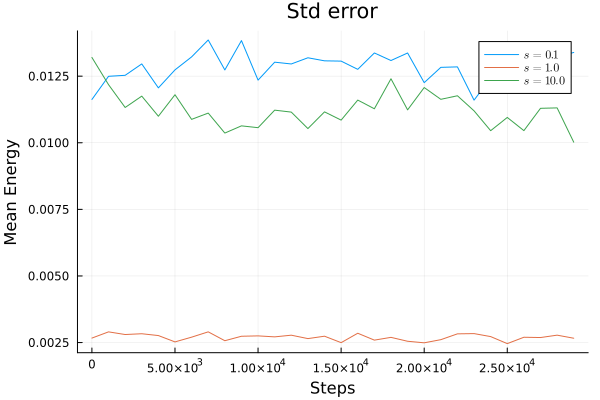

In [14]:
p = plot(1:1000:30000,stds[1], label=L"s=0.1")
plot!(1:1000:30000,stds[2], label=L"s=1.0")
plot!(1:1000:30000,stds[3], label=L"s=10.0")
xlabel!("Steps")
ylabel!("Mean Energy")
title!("Std error")

savefig(p, "saves/task1a.stds.pdf")

display(p)


## Task 1b

- set $a=0.1$
- find n for equilibriation by varying $\alpha$

In [37]:
function calculateResults()
    αs = [0., 0.1, 0.2, 0.3, 0.4, 0.5]
    
    stds = []
    avEs = []
    
    for (i,α) in collect(enumerate(αs))
        avE, stdE = runSimulation(M=300,N=10000,n=1000,n_eq=0,s=0.1,α=α,β=0.5,κ=2.0)
        push!(stds, stdE)
        push!(avEs, avE)
    end

    return avEs, stds
end

calculateResults (generic function with 2 methods)

In [38]:
@time avEs, stds = calculateResults();

 10.734821 seconds (306.19 M allocations: 18.126 GiB, 13.17% gc time)


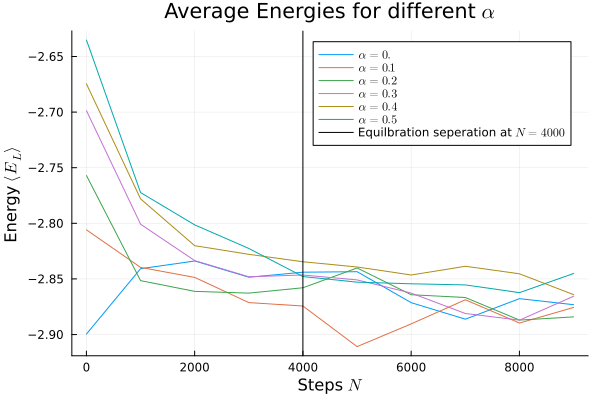

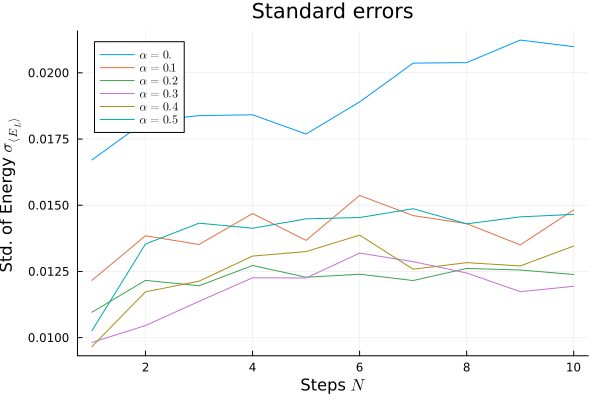

In [42]:

labels = [L"\alpha = 0." L"\alpha = 0.1" L"\alpha = 0.2" L"\alpha = 0.3" L"\alpha = 0.4" L"\alpha = 0.5"]

p1 = plot(1:1000:10000, avEs[1], label=labels[1], title=L"Average Energies for different $α$")
for i in 2:length(avEs)
    p1 = plot!(1:1000:10000, avEs[i], label=labels[i],)
end
vline!([4000], color="black", label=L"Equilbration seperation at $N=4000$")
xlabel!(L"Steps $N$")
ylabel!(L"Energy $⟨E_L⟩$")

p2 = plot(1:10, stds, labels=labels, title="Standard errors")
xlabel!(L"Steps $N$")
ylabel!(L"Std. of Energy $σ_{⟨E_L⟩}$")

savefig(p1, "saves/task1b.avEnergies.pdf")
savefig(p2, "saves/task1b.avStd.pdf")
display(p1)
display(p2)

## Task 1c

- set equilibrium n
- find optimal $\alpha$

In [ ]:
NEQ = 4000
n = 10000-NEQ

In [43]:
function calculateResults(αs)

    avEnergies = zeros(length(αs))
    stdEnergies = zeros(length(αs))

    Threads.@threads for (i,α) in collect(enumerate(αs))
        res1, res2 = runSimulation(M=300,N=10000,n=n,n_eq=NEW,s=0.1,α=α,β=0.5,κ=2.0)
        avEnergies[i] = res1[1]
        stdEnergies[i] = res2[1]
    end

    return avEnergies, stdEnergies
end


calculateResults (generic function with 2 methods)

In [44]:
αs = 0:0.005:0.5
@time avEnergies, stdEnergies = calculateResults(αs);


 41.935885 seconds (4.31 G allocations: 240.956 GiB, 47.89% gc time, 0.07% compilation time)


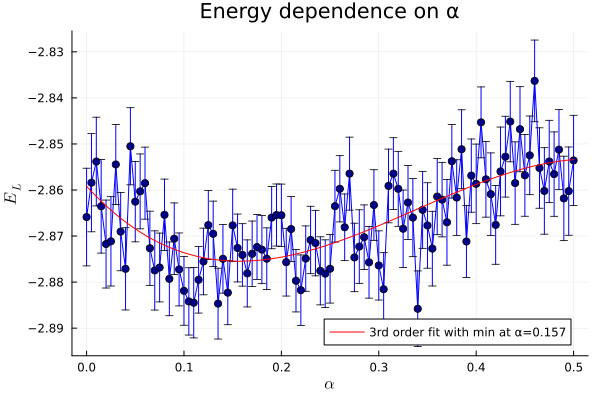

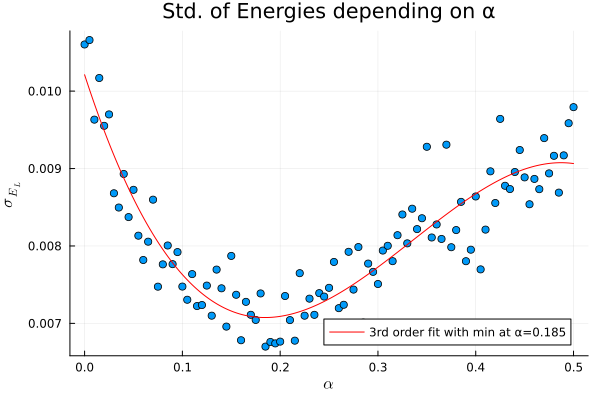

In [45]:
fit = curve_fit(Polynomial, αs, avEnergies, 3)

fitα = 0:0.001:0.5
yb = fit.(fitα)


p1 = plot(αs, avEnergies.±stdEnergies, lc="blue", label="")
scatter!(αs, avEnergies, label="", mc="darkblue")
plot!(fitα,yb, color="red", label="3rd order fit with min at α=$(fitα[findmin(yb)[2]])")
title!("Energy dependence on α")
xlabel!(L"α")
ylabel!(L"E_L")


fitstds = curve_fit(Polynomial, αs, stdEnergies, 3)
ybstds = fitstds.(fitα)

p2 = scatter(αs, stdEnergies, title="Std. of Energies depending on α", xlabel=L"α", ylabel=L"σ_{E_L}", label="")
plot!(fitα,ybstds, color="red", label="3rd order fit with min at α=$(fitα[findmin(ybstds)[2]])")

savefig(p1, "saves/task1c.avEnergies.pdf")
savefig(p2, "saves/task1c.avStd.pdf")
display(p1)
display(p2)

In [47]:
α = 0.18

0.18

## Task 1d

- fixing $\alpha=0.18$
- finding $\kappa$

In [48]:
function calculateResults(κs)

    avEnergies = zeros(length(κs))
    stdEnergies = zeros(length(κs))

    Threads.@threads for (i,κ) in collect(enumerate(κs))
        res1, res2 = runSimulation(M=300,N=10000,n=n,n_eq=NEQ,s=0.1,α=α,β=0.5,κ=κ)
        avEnergies[i] = res1[1]
        stdEnergies[i] = res2[1]
    end

    return avEnergies, stdEnergies
end

calculateResults (generic function with 2 methods)

In [49]:
κs = 1.7:0.005:2.2
@time avEnergies, stdEnergies = calculateResults(κs);

LoadError: TaskFailedException

[91m    nested task error: [39mUndefVarError: n not defined
    Stacktrace:
     [1] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m./[39m[90m[4mIn[48]:7[24m[39m[90m [inlined][39m
     [2] [0m[1m(::var"#161#threadsfor_fun#13"{var"#161#threadsfor_fun#12#14"{Vector{Float64}, Vector{Float64}, Vector{Tuple{Int64, Float64}}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:84[24m[39m
     [3] [0m[1m#161#threadsfor_fun[22m
    [90m   @ [39m[90m./[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [4] [0m[1m(::Base.Threads.var"#1#2"{var"#161#threadsfor_fun#13"{var"#161#threadsfor_fun#12#14"{Vector{Float64}, Vector{Float64}, Vector{Tuple{Int64, Float64}}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:30[24m[39m

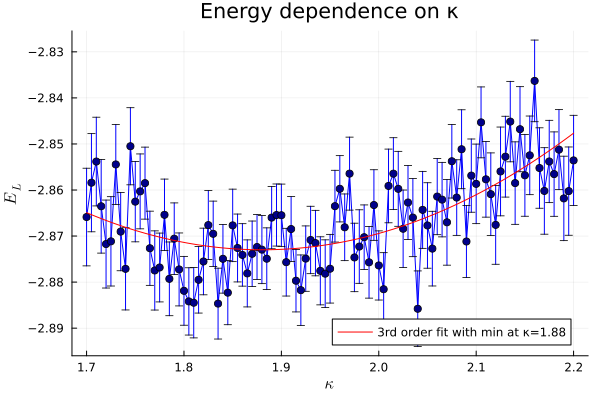

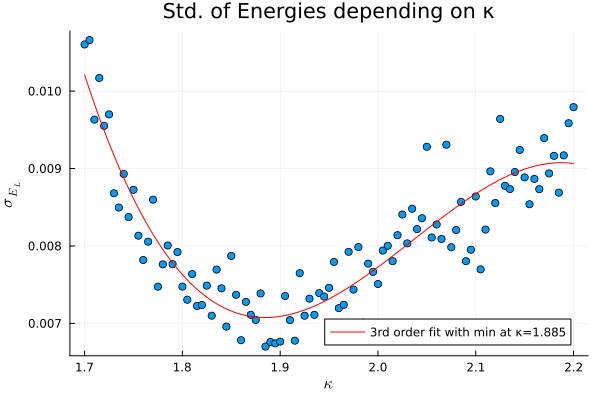

In [50]:
fit = curve_fit(Polynomial, κs, avEnergies, 2)

fitκs =1.7:0.001:2.2
yb = fit.(fitκs)

p1 = plot(κs, avEnergies.±stdEnergies, lc="blue", title="Energy dependence on κ", xlabel=L"κ", ylabel=L"E_L", label="")
scatter!(κs, avEnergies, label="", mc="darkblue")
plot!(fitκs,yb, color="red", label="3rd order fit with min at κ=$(fitκs[findmin(yb)[2]])")



fitstds = curve_fit(Polynomial, κs, stdEnergies, 3)
ybstds = fitstds.(fitκs)

p2 = scatter(κs, stdEnergies, title="Std. of Energies depending on κ", xlabel=L"κ", ylabel=L"σ_{E_L}", label="")
plot!(fitκs,ybstds, color="red", label="3rd order fit with min at κ=$(fitκs[findmin(ybstds)[2]])")


savefig(p1, "saves/task1d.avEnergies.pdf")
savefig(p2, "saves/task1d.avStd.pdf")
display(p1)
display(p2)


## task 1e 

- compare optimal $\alpha=0.18$, $\beta=0.38$ and $\kappa=1.85$ to experimental value

In [24]:
res = runSimulation(M=300,N=10000,n=n,n_eq=NEQ,s=0.1,α=0.18,β=0.38,κ=1.85)

([-2.8873711433364146], [0.004761999101221739])